# Popular Data Science Questions

For this project, we are working for a company that creates Data Science content.  We are collecting data from Stack Exchange, which is a website where people ask and answer questions related to math and computer science fields.  The company wants us to find out which Data Science topics are most commonly used and create content around that information.

When exploring Stack Exchange you can see the questions asked have tags which tell you what the question is related too.  You can look for questions by filtering the tags to show only questions you are interested in.  We will use tags to help us determine what data science topics are relevent.

## Stack Exchange Data Explorer

Stack Exchange has a public database that people can use to gather data.  To use the Stack Exchange Data Explore you can click [here](https://data.stackexchange.com/datascience/query/new).

Looking at the post table to the right in the data explore we can see there are 23 columns.  We are only going to only focus on 7 columns:
    1. Id: The Identification number for each post
    2. CreationDate: The time and date when post was created
    3. Score: The post score
    4. ViewCount: Number of views
    5. Tags: Tags used for post
    6. AnswerCount: The number of answers the post got
    7. FavoriteCount: The number of times the post was favorite

## Obtaining Data

The following is the query ran to get the data from the database:

    SELECT Id,
           CreationDate,
           Score,
           ViewCount,
           Tags,
           AnswerCount,
           FavoriteCount
    FROM Posts
    WHERE YEAR(CreationDate) = 2019
          AND PostTypeId = 1
    ORDER BY CreationDate;
    
Once the query has ran then it is saved as 2019_questions.csv.

## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Set for charts and graphs
%matplotlib inline

In [2]:
# Importing the 2019_questions.csv 
data = pd.read_csv('2019_questions.csv')

# Exploring the data
data.head(10)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


In [3]:
# Exploring the type of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


Looking at the data from Stack Exchange we can see FavoriteCount has missing values.  Just from a glance we can tell that NaN most likely means that no one has favorite the question so it can be safe to assume we replace the NaN with zeros.  Also it doesn't need to be a float type so we can change that too a integer type. We can also change the type of CreationDate too datetime to make easier use of it. For the values in Tags we can clean them up a bit by removing the brackets and turning them into lists.

## Data Cleaning

In [4]:
# Filling the NaN with zeros
data['FavoriteCount'] = data['FavoriteCount'].fillna(0).astype('int')

In [5]:
# Converting CreationDate to datetime
data['CreationDate'] = pd.to_datetime(data['CreationDate'])

In [6]:
# Cleaning up the tags and converting into lists
data['Tags'] = data['Tags'].str.replace('><', ',').str.replace('<','').str.replace('>','')
data['Tags'] = data['Tags'].apply(lambda x : x.split(','))

In [7]:
# Checking to see the converted tags
data['Tags'].head(5)

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
Name: Tags, dtype: object

In [8]:
# Checking to see data cleaning has been completed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


Now that the data has been clean we can start exploring the data to see what useful information.  We will start by looking at how often the tags are used and how many views each tag gets.

## Most Used and Viewed Tags

In [9]:
# Creating empty dictionary for tag counts
tag_counts = {}

# Getting the count for each tag
for tags in data['Tags']:
    for t in tags:
        if t in tag_counts:
            tag_counts[t] += 1
        else:
            tag_counts[t] = 1

In [10]:
# Converting dict to DataFrame and renaming column
counts = pd.DataFrame.from_dict(tag_counts, orient = 'index')
counts = counts.rename(columns = {0:'count'})

In [11]:
# Sorting counts dataframe by count and getting top 20
top_tag_counts = counts.sort_values(by = 'count', ascending = True).tail(20)

In [12]:
# Creating empty dictionary for tags views
tag_views = {}

# Getting the total amount of views for each tag
for index,row in data.iterrows():
    for tag in row['Tags']:
        if tag in tag_views:
            tag_views[tag] += row['ViewCount']
        else:
            tag_views[tag] = row["ViewCount"]

In [13]:
# Converting dict to DataFrame and renaming column
views = pd.DataFrame.from_dict(tag_views, orient = 'index')
views = views.rename(columns = {0:'views'})

In [14]:
# Sorting counts dataframe by views and getting top 20
top_tag_views = views.sort_values(by='views', ascending = True).tail(20)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1df6117f60>],
      dtype=object)

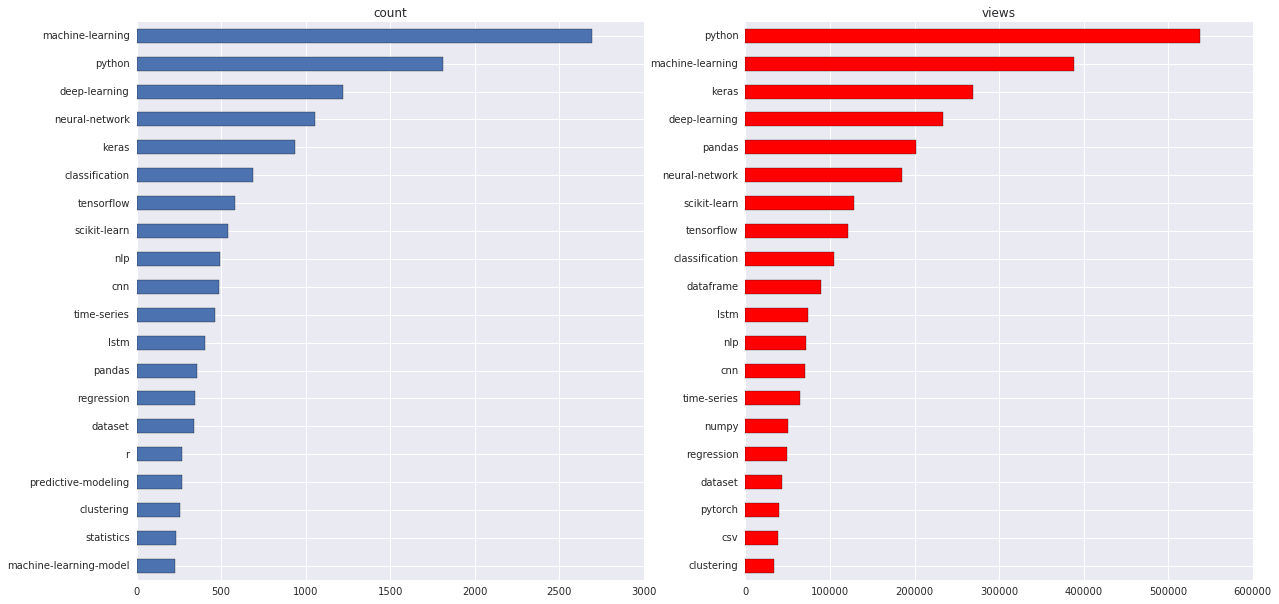

In [15]:
# Creating Graphs to show the top 20 of counts and views
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches((20,10))
top_tag_counts.plot(kind = 'barh', ax=axes[0], subplots = True, legend =False)
top_tag_views.plot(kind = 'barh', ax =axes[1], subplots = True, color = 'red', legend = False)

By looking at the graphs side by side we can see that they share quite a bit of the same tags.  Which makes sense since the tags with high counts post would also have high view counts.  Another thing to notice is that their are a few tags in counts that aren't in views and vice versa.

## Relations Between Tags

In [16]:
# Merging the view dataframe on counts dataframe
count_merge_views = pd.merge(top_tag_counts,top_tag_views, how = 'left', left_index = True, right_index = True)
count_merge_views.sort_values(by = ['count'], ascending = False)

,count,views
machine-learning,2693,388499.0
python,1814,537585.0
deep-learning,1220,233628.0
neural-network,1055,185367.0
keras,935,268608.0
classification,685,104457.0
tensorflow,584,121369.0
scikit-learn,540,128110.0
nlp,493,71382.0
cnn,489,70349.0


In [17]:
# Merging the counts dataframe on views dataframe
views_merge_counts = pd.merge(top_tag_views, top_tag_counts, how = 'left', left_index =True, right_index= True)
views_merge_counts.sort_values(by = ['views'], ascending = False)

,views,count
python,537585,1814.0
machine-learning,388499,2693.0
keras,268608,935.0
deep-learning,233628,1220.0
pandas,201787,354.0
neural-network,185367,1055.0
scikit-learn,128110,540.0
tensorflow,121369,584.0
classification,104457,685.0
dataframe,89352,NaN


We can see that in the counts dataframe that machine learning model, statistics, predictive modeling and r are in the top 20 counts but not in the top 20 views.  While in the views dataframe the four tags that don't show up in count are csv, pytorch, numpy and dataframe.  It looks like the difference between the two dataframes are the tags in counts are topics about Data Science besides r while the views tags are tools used in python for Data Science.

In [18]:
# Getting a list of tags from top_tag_counts dataframe
unique_count_tags = list(top_tag_counts.index)

In [19]:
# Creating empty matrix using the unique_count_tags
count_tag_matrix = pd.DataFrame(index = unique_count_tags, columns = unique_count_tags)

In [20]:
# Filling in the matrix
count_tag_matrix.fillna(0, inplace = True)
for x in unique_count_tags:
    for y in unique_count_tags:
        count = 0
        for z in data['Tags']:
            if (x in z and y in z):
                count_tag_matrix.loc[x,y] += 1

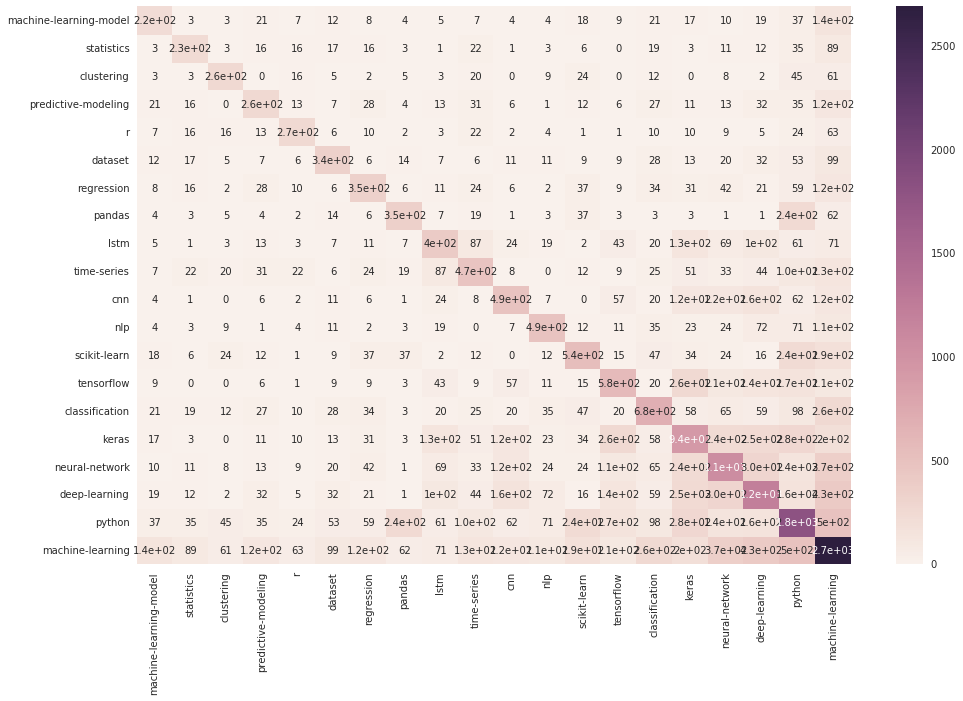

In [21]:
# Creating a heatmap to see the relationships between the tags
plt.figure(figsize = (16,10))
sn.heatmap(count_tag_matrix, annot = True)

By looking at the heatmap it doesn't look like many of the top 20 tags have a correlation with each other.  It looks like machine learning would be the most noticable one that has a correlation with a few tags.  We can say that the top 3 tags from the top_tag_counts are machine-learning, python and deep-learning.  

## Just a Fad

Now that we have looked at tags used in 2019, now we look at the tags used all time.  We can see the trends Data Science questions by looking at the tags.  To get that data we use the following code:

     SELECT Id, CreationDate, Tags
     FROM posts
     WHERE PostTypeId = 1;
     
Then save as all_questions.csv

In [22]:
# Reading the csv file
questions = pd.read_csv('all_questions.csv')

In [23]:
# Cleaning the tags column
questions['Tags'] = questions['Tags'].str.replace('><', ',').str.replace('<','').str.replace('>','')
questions['Tags'] = questions['Tags'].apply(lambda x : x.split(','))

In [25]:
# Checking to see the clean Tags column 
questions

,Id,CreationDate,Tags
0,45416,2019-02-12 00:36:29,"[python, keras, tensorflow, cnn, probability]"
1,45418,2019-02-12 00:50:39,[neural-network]
2,45422,2019-02-12 04:40:51,"[python, ibm-watson, chatbot]"
3,45426,2019-02-12 04:51:49,[keras]
4,45427,2019-02-12 05:08:24,"[r, predictive-modeling, machine-learning-mode..."
5,45428,2019-02-12 05:43:18,[cnn]
6,45430,2019-02-12 06:20:30,"[machine-learning, learning]"
7,45431,2019-02-12 07:26:56,[machine-learning]
8,45433,2019-02-12 08:56:23,"[python, keras, tensorflow, lstm]"
9,45434,2019-02-12 09:09:01,"[neural-network, feature-selection, mlp]"


In [26]:
# Getting a list of unique tags
question_tags = []

for tags in questions['Tags']:
    for x in range(len(tags)):
        if tags[x] not in question_tags:
            question_tags.append(tags[x])

In [27]:
# Looking at the list of tags
question_tags

['python',
 'keras',
 'tensorflow',
 'cnn',
 'probability',
 'neural-network',
 'ibm-watson',
 'chatbot',
 'r',
 'predictive-modeling',
 'machine-learning-model',
 'simulation',
 'machine-learning',
 'learning',
 'lstm',
 'feature-selection',
 'mlp',
 'recommender-system',
 'classification',
 'anaconda',
 'deep-learning',
 'scikit-learn',
 'random-forest',
 'data-mining',
 'time-series',
 'rnn',
 'data-cleaning',
 'dataset',
 'pandas',
 'statistics',
 'sampling',
 'feature-engineering',
 'clustering',
 'similarity',
 'variance',
 'dbscan',
 'graphs',
 'data',
 'decision-trees',
 'prediction',
 'h2o',
 'word-embeddings',
 'nlp',
 'topic-model',
 'lda',
 'regression',
 'class-imbalance',
 'multilabel-classification',
 'data-wrangling',
 'xgboost',
 'hyperparameter',
 'ab-test',
 'attention-mechanism',
 'orange',
 'perceptron',
 'training',
 'k-nn',
 'matrix-factorisation',
 'text-mining',
 'preprocessing',
 'accuracy',
 'epochs',
 'activation-function',
 'scipy',
 'pca',
 'dimensionality

Now that we have a list, we do a google search to see what tags are related to deep learning.  From the google search we have a list of tags that are related to deep learning.

    'deep learning', 'neural-network', 'cnn', 'lstm', 'rnn', 'gan', 'rbfn', 'mlp', 'som', 'dbm', 'rbm', 'autoencoder'
    
These are techinques used in deep learning so questions about these techinques would be consider deep learning related.

In [28]:
# Creating list of deep learning tags
dl_list = ['deep learning', 'neural-network', 'cnn', 'lstm', 'rnn', 'gan', 'rbfn', 'mlp', 'som', 'dbm', 'rbm', 'autoencoder']

In [29]:
# Cleaning up CreationDate column
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])

In [30]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 3 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 505.8+ KB


In [31]:
# Creating a Year column
questions['Year'] = pd.PeriodIndex(questions.CreationDate, freq ='Y')

In [32]:
# Converting Year column to a str
questions['Year'] = questions['Year'].apply(lambda x : str(x))

In [33]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21576 entries, 0 to 21575
Data columns (total 4 columns):
Id              21576 non-null int64
CreationDate    21576 non-null datetime64[ns]
Tags            21576 non-null object
Year            21576 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 674.3+ KB


In [34]:
# Creating a dataframe getting the total questions asked during each year
tq_df = questions['Year'].value_counts().sort_index().to_frame(name = 'total_questions')

In [35]:
# Looking at the total questions asked for each year
tq_df

,total_questions
2014,562
2015,1167
2016,2146
2017,2957
2018,5475
2019,8810
2020,459


In [36]:
# Creating empty dict for total number of deep learning questions asked per year
dlq = {}

# Checking if tag is deep learning related and counting the number asked per year
for row in range(len(questions)):
    check = any(tag in dl_list for tag in questions.loc[row,'Tags'])
    if check is True:
        q = questions.loc[row,'Year']
        if q not in dlq:
            dlq[q] = 1
        else:
            dlq[q] += 1

In [37]:
# Converting dict to Dataframe
dlq = pd.DataFrame.from_dict(dlq,orient = 'index')
dlq = dlq.rename(columns = {0:'deep_learning_tag'})
dlq = dlq.sort_index()

In [38]:
# Merging the two dataframes tq_df and dlq together
deep_learning = pd.merge(tq_df,dlq, how = 'left',left_index = True, right_index = True)

In [39]:
# Creating a column that has the percent of deep learning questions asked per year
deep_learning['percent_of_deep_learning_questions'] = round(deep_learning['deep_learning_tag'] * 100 /deep_learning['total_questions'],2)

In [40]:
# Resetting index to order by year
deep_learning.reset_index(inplace = True)

In [41]:
# Renaming index to year
deep_learning = deep_learning.rename(columns = {'index':'year'})

In [42]:
# Converting year to int type
deep_learning['year'] = deep_learning['year'].astype(int)

In [43]:
# Looking at the dataframe
deep_learning

,year,total_questions,deep_learning_tag,percent_of_deep_learning_questions
0,2014,562,27,4.80
1,2015,1167,98,8.40
2,2016,2146,315,14.68
3,2017,2957,594,20.09
4,2018,5475,1403,25.63
5,2019,8810,1918,21.77
6,2020,459,82,17.86


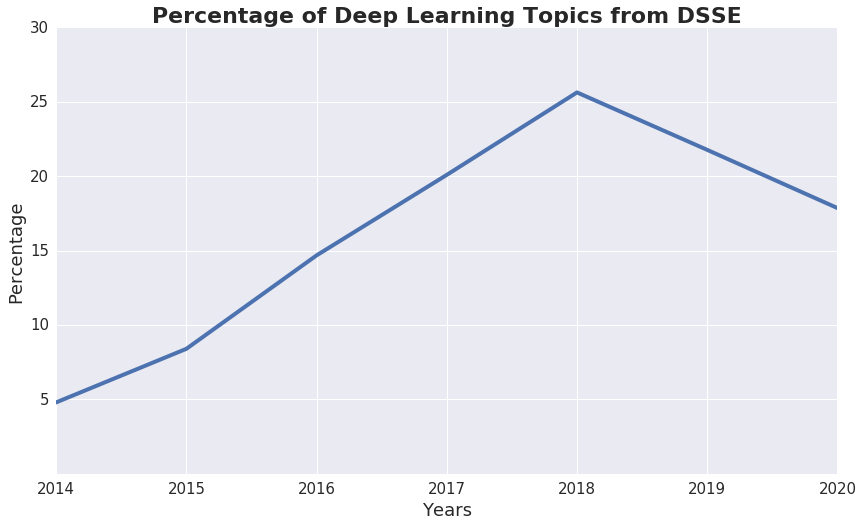

In [44]:
# Creating a line plot to see how Deep Learning Topics have trend over the recent years
x = list(deep_learning['year'])
fig = plt.figure(figsize = (14,8))
plt.plot(deep_learning['year'], deep_learning['percent_of_deep_learning_questions'], linewidth = 4)
plt.xticks(deep_learning['year'], x, fontsize = 15)
plt.yticks([5,10,15,20,25,30],fontsize = 15)
plt.xlabel('Years', size = 18)
plt.ylabel('Percentage', size = 18)
plt.title('Percentage of Deep Learning Topics from DSSE', size = 22, weight = 'bold')
plt.show()

Based on the graph it shows an increase in interest from 2014 at under 5% to its peak in 2018 at just over 25%.  In 2019 it dropped a little but with 20% of total questions asked, its still a very popular topic.

## Conclusion

Recommending a topic to create content for deep learning is a strong choice.  For every 5 questions, 1 is about deep learning.  Which makes it pretty strong considering all the topics related to data science.